## Project Overview
### Train and test a classification model(s) on the Default dataset.
Before training a model on this dataset, a good understanding of each explanatory variable (features) is vital.
### Definition of each feature

 - **limit_bal**: limit balance also known as credit limit is the **credit limit** after applying for a credit card determined by the credit card issuer.
 - **sex:** Sex of the credit card owner which is either 1 for **Male** or 2 for **Female**
 - **education:** Highest level of education for the credit card owner. where 1 = graduate school; 2 = university; 3 = high school; 4 = others
 - **marriage:** Marital status of credit card owner where 1 = married; 2 = single; 3 = others
 - **age:** Ages of card owners.
 - **pay_0 to pay_6:** History of past monthly pay records starting from April(pay_0) to September(pay_6) for each card owner.
    statuses are 0: pay duly, 1: payment delay for one month, 2: payment delay for two months.
 - **bill_amtt1 to bill_amnt6** represents amount of bill statement from April(bill_amt1) to September(bill_amt6). 
    **Bill statement** is a periodic statement that lists all the payments, purchases and other debits and credits during the billing cycle.
 - **pay_amt1 to pay_amt6** is amount paid in the previous month. From April(pay_amt1) to September(pay_amt6)
 - **defaulted:** To defauult means failure to pay a debt on the agreed upon date. IN this case, creditors mostly raise interest rates or decrese the credit limit.
        
Since defaulted is the target variable in this case, suitable models will be used to train and test the other explanatory variables and see which model predicts with highest accuracy on the dataset.


In [1]:
#importing packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/Users/mlopatka/repos/PRESC/datasets/defaults.csv')
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# check for null values
data.isnull().any().any()

False

In [5]:
# Using a Logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.iloc[:, 0:24].values
y = data.iloc[:, 24].values

# Splitting the data into train and test set in the ratio 80:20
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


# logistic regression classifier with regularization set to l1.
clf_lr = LogisticRegression(penalty='l1', solver='liblinear')

clf_lr.fit(Xtrain, ytrain)
     
ypred_test = clf_lr.predict(Xtest)

accuracy_score1 = accuracy_score(ypred_test, ytest)
print('[Test] Accuracy score with all the records included : ', round(accuracy_score1, 4))

[Test] Accuracy score with all the records included :  0.8197


In [6]:
# convert the numpy array (Xtrain) to a dataframe so as to better see which point has fallen under the train set
trial_X = pd.DataFrame(Xtrain)
# Putting back column names to better visualize the data

trial_X.columns = ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5',
                   'bill_amt6', 'pay_amt1',  'pay_amt2',   'pay_amt3', 'pay_amt4',  'pay_amt5',   'pay_amt6'  ]
trial_X.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,...,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,3226,20000,2,3,1,44,0,0,2,0,...,17980,18780,0,0,3000,0,1000,1000,0,0
1,11816,260000,2,2,2,30,-1,-1,-1,-1,...,274,165,333,165,165,274,165,333,165,293
2,7339,20000,1,2,1,39,2,0,0,0,...,19299,19928,20204,20398,1500,1500,900,700,1480,0
3,14981,30000,1,2,1,23,2,2,2,2,...,28635,30127,30525,29793,1800,150,2250,1000,0,700
4,27168,10000,1,2,1,29,0,0,0,0,...,8600,9470,6690,9690,2800,2000,1500,900,3000,0


In [7]:
#size of the train set
trial_X.shape

(24000, 24)

In [8]:
'''
Using all the datapoints in the train set took too long to be computed as the total number of records sums upto 24,000
I therefore decided to consider the first 200 records in the train set 
'''

# train = trial_X['id'].head(200)
# train set id is converted to an array
# train = np.array(train)

accuracy_score1 = 0.8197
score = []
diff = []

for i in np.array(trial_X['id']):
    
    sub_data = data.drop(data.index[i-1])
    
    X = sub_data.iloc[:, 0:24].values
    y = sub_data.iloc[:, 24].values

    # Splitting the data into train and test set in the ratio 80:20
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

    # logistic regression classifier with regularization set to l1.
    clf_lr = LogisticRegression(penalty='l1', solver='liblinear')

    clf_lr.fit(Xtrain, ytrain)

    ypred_test_drop = clf_lr.predict(Xtest)

    accuracy_score2 = accuracy_score(ypred_test_drop, ytest)
    score.append(round(accuracy_score2, 4))
    
    # test accuracy difference 
    test_diff = accuracy_score1 - accuracy_score2
    diff.append(round(test_diff, 4))



In [11]:
output = pd.DataFrame({'Dropped record': np.array(trial_X['id']), 'Initial test accuracy': accuracy_score1, 'New test accuracy': score, 'Difference': diff})
output.head(10)

,Dropped record,Initial test accuracy,New test accuracy,Difference
0,3226,0.8197,0.8128,0.0069
1,11816,0.8197,0.8127,0.0070
2,7339,0.8197,0.8140,0.0057
3,14981,0.8197,0.8108,0.0089
4,27168,0.8197,0.8128,0.0069
5,23155,0.8197,0.8112,0.0085
6,18327,0.8197,0.8132,0.0065
7,29264,0.8197,0.8150,0.0047
8,21934,0.8197,0.8143,0.0054
9,2662,0.8197,0.8122,0.0075


In [14]:
output.shape

(24000, 4)

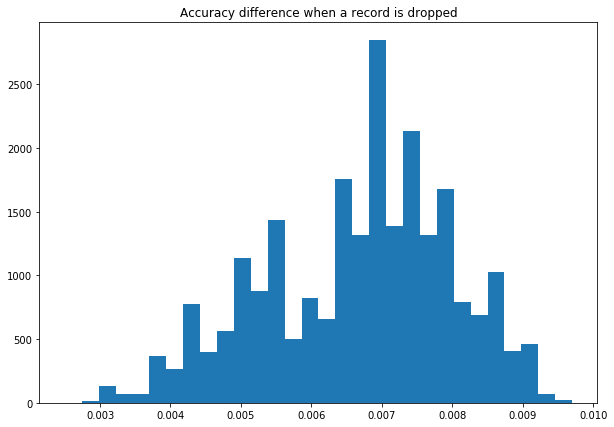

In [18]:
plt.rcParams["figure.figsize"] = (10,7)
plt.hist(output['Difference'], bins = 30)
plt.title('Accuracy difference when a record is dropped')
plt.show()

## Observations from the table above
- Considering 200 records in the train set, dropping each of these has an influence on the test accuracy. All these points though at different index positions caused a decrease in the test accuracy.
- There was a slight difference in the magnitude of this difference but all caused a fall in the accuracy score of the test set with some causing upto 0.8% fall in accuracy.
- This visualization therefore shows that any point dropped off the train set will have a negative influence on the model performance when validated.
- Every record(data point) in the train set therefore helps the model to perform better on the data as when it is tested, these points that were used to train it will therefore improve model performance as it is being tested.